Анастасия Плавина

### Тема: Стохастический градиентный спуск. L2-регуляризация.

1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
from sklearn.datasets import make_regression 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [3]:
def scaler(X):
    """
    Масштабирование данных
    
    X: матрица признаков
    
    returns: масштабированная матрица признаков
    
    """
    
    X_scaled = X[1:,].copy()
    
    # расчет среднего и отклонения для каждого признака
    X_mean, X_std = X_scaled.mean(axis=1), X_scaled.std(axis=1)
    X_mean, X_std = X_mean.reshape(X_scaled.shape[0], 1), X_std.reshape(X_scaled.shape[0], 1)

    # стандартизация
    X_scaled = (X_scaled - X_mean) / X_std
    
    # приведение к виду с единицами
    X_scaled = np.vstack((np.ones(X_scaled.shape[1]), X_scaled))
    
    return X_scaled

In [4]:
X, y, w_true = make_regression(n_samples=500, n_features = 4, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [5]:
X = scaler(X)

In [6]:
def gradient_descent(X, y, alpha):
    """Функция реализует градиентный спуск
    """
    np.random.seed(1234)
    w = np.zeros(X.shape[1])
    errors = []
    
    max_iter = 1e4
    weight_dist = np.inf
    min_weight_dist = 1e-8
    i = 0

    while weight_dist > min_weight_dist and i < max_iter: 
        y_pred = X.dot(w)

        new_w = w - 2 * alpha * np.dot(X.T, (y_pred - y)) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        errors.append(mserror(X, new_w, y))

        i += 1
        w = new_w
    
    return i, errors

In [7]:
def sgd(X, y, alpha):
    """Функция реализует стохастический градиентный спуск
    """
    np.random.seed(1234)
    w = np.zeros(X.shape[1])
    errors = []
    
    max_iter = 1e5
    weight_dist = np.inf
    min_weight_dist = 1e-8
    i = 0

    while weight_dist > min_weight_dist and i < max_iter:

        train_ind = np.random.randint(X.shape[0])

        new_w = w - 2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        errors.append(mserror(X, new_w, y))

        i += 1
        w = new_w
    
    return i, errors

In [8]:
alpha = 1e-2

In [9]:
i_basic, errors_basic = gradient_descent(X, y,alpha)

In [10]:
i_sgd, errors_sgd = sgd(X, y,alpha)

Gradient descent
alpha: 0.01	 iterations: 10000	 min_error: 5314.6533
Stochastic gradient descent
alpha: 0.01	 iterations: 100000	 min_error: 5330.3702



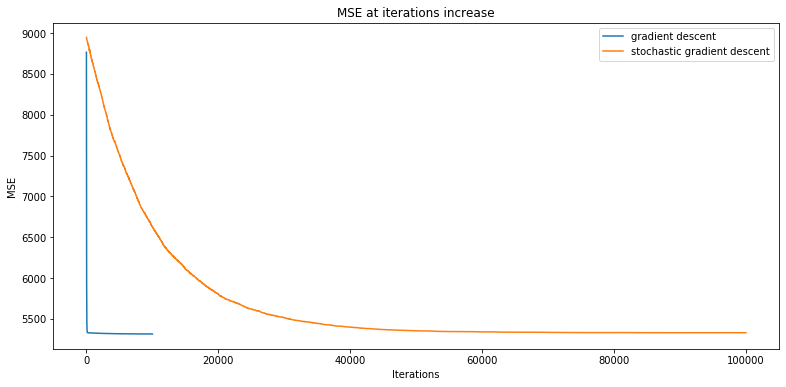

In [11]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE at iterations increase')

ax.plot(range(len(errors_basic)), errors_basic, label='gradient descent')
ax.plot(range(len(errors_sgd)), errors_sgd, label='stochastic gradient descent')

print(f'Gradient descent\nalpha: {alpha}\t iterations: {i_basic}\t min_error: {round(errors_basic[-1], 4)}')
print(f'Stochastic gradient descent\nalpha: {alpha}\t iterations: {i_sgd}\t min_error: {round(errors_sgd[-1], 4)}\n')

plt.legend()
plt.show()

Вывод: в результате стандартного градиентного спуска достигается меньшая ошибка, при этом для этого требуется гораздо меньшее количество итераций, чем для SGD, то есть сходимость SGD меньше. 

2. Модифицировать решение первого задания путем добавления 𝐿2-регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [12]:
def ridge_mserror(X, w, y_pred, lambda_=1e-7):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + lambda_*np.dot(w.T, w)

In [13]:
def ridge_gradient_descent(X, y, alpha, lambda_=1e-7):
    """Функция реализует градиентный спуск
    """
    w = np.zeros(X.shape[1])
    errors = []
    
    max_iter = 1e4
    weight_dist = np.inf
    min_weight_dist = 1e-8
    i = 0

    while weight_dist > min_weight_dist and i < max_iter: 
        y_pred = X.dot(w)

        new_w = w - (2 * alpha * np.dot(X.T, (y_pred - y)) + lambda_ * w) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        errors.append(ridge_mserror(X, new_w, y))

        i += 1
        w = new_w
    
    return i, errors

In [14]:
def ridge_sgd(X, y, alpha, lambda_=1e-7):
    """Функция реализует стохастический градиентный спуск
    """
    
    w = np.zeros(X.shape[1])
    errors = []
    
    max_iter = 1e5
    weight_dist = np.inf
    min_weight_dist = 1e-8
    i = 0

    while weight_dist > min_weight_dist and i < max_iter:

        train_ind = np.random.randint(X.shape[0])

        new_w = w - (2 * alpha * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) + lambda_ * w) / y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)
        errors.append(ridge_mserror(X, new_w, y))

        i += 1
        w = new_w
    
    return i, errors

In [15]:
i_basic_ridge, errors_basic_ridge = ridge_gradient_descent(X, y, alpha)

In [16]:
i_sgd_ridge, errors_sgd_ridge = ridge_sgd(X, y, alpha)

Gradient descent
alpha: 0.01	 iterations: 10000	 min_error: 5314.6537
Stochastic gradient descent
alpha: 0.01	 iterations: 100000	 min_error: 5329.8354



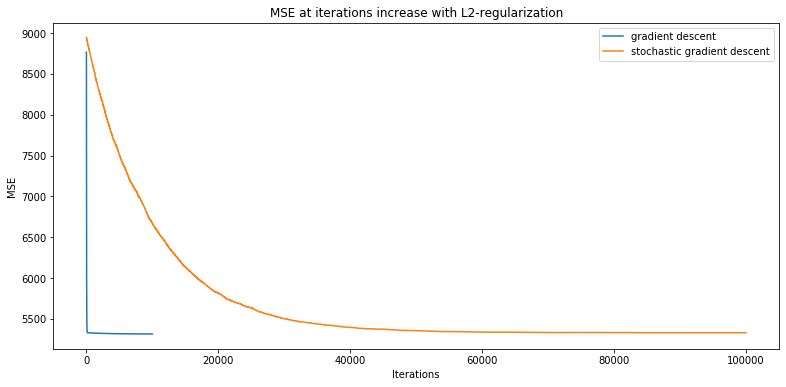

In [17]:
fig = plt.figure(figsize=(13, 6))
ax = fig.add_subplot()
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.title('MSE at iterations increase with L2-regularization')

ax.plot(range(len(errors_basic_ridge)), errors_basic_ridge, label='gradient descent')
ax.plot(range(len(errors_sgd_ridge)), errors_sgd_ridge, label='stochastic gradient descent')

print(f'Gradient descent\nalpha: {alpha}\t iterations: {i_basic_ridge}\t min_error: {round(errors_basic_ridge[-1], 4)}')
print(f'Stochastic gradient descent\nalpha: {alpha}\t iterations: {i_sgd_ridge}\t min_error: {round(errors_sgd_ridge[-1], 4)}\n')

plt.legend()
plt.show()

Регулиризация позволила снизить ошибку стохастического градиентного спуска практически до уровня ошибки стандартного градиентного спуска, но замедлила скорость сходимости. Сходимость и ошибка при стандартном градиентном спуске осталась практически без изменений.